In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv")

In [5]:
df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


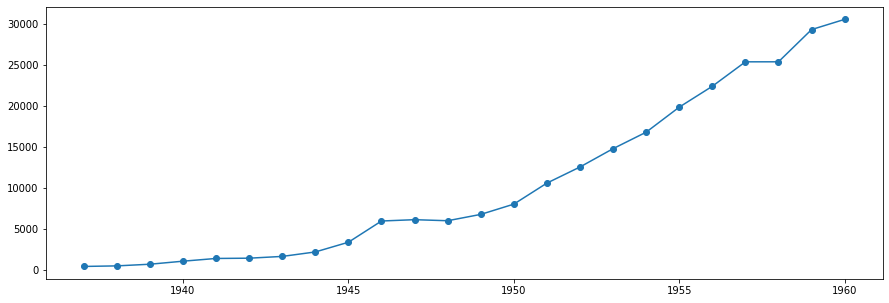

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df.time, df.airmiles, 'o-');

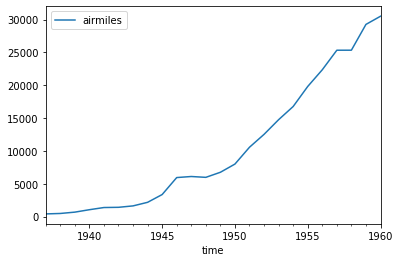

In [7]:
path = ("https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv")
df = pd.read_csv(path, parse_dates=['time'], index_col='time')

df[['airmiles']].plot();

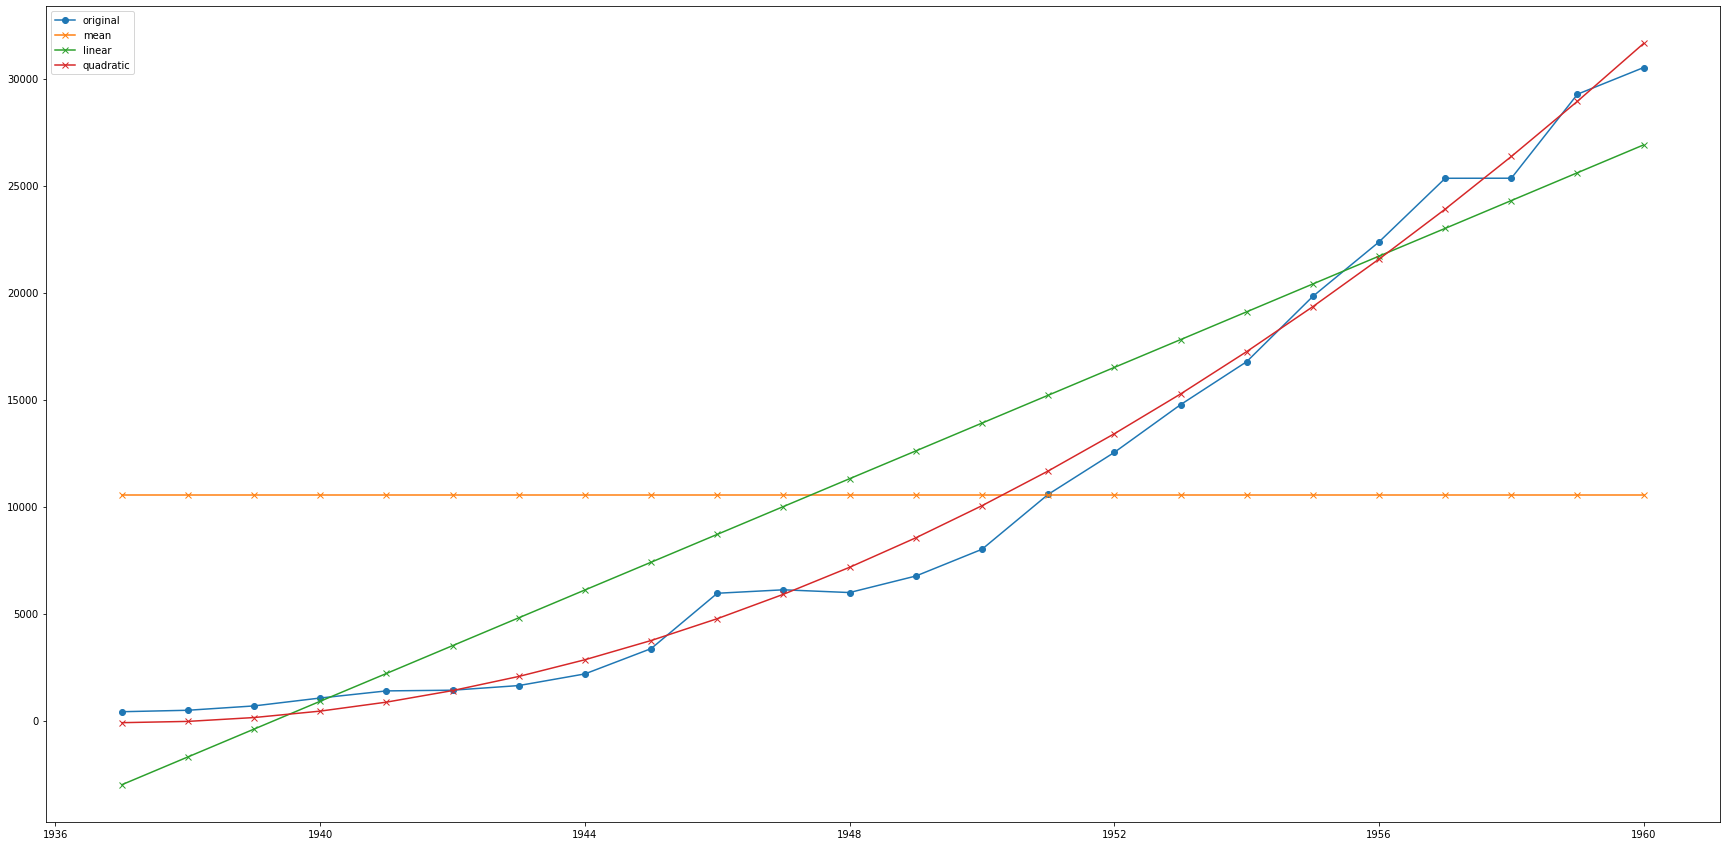

In [20]:
def linear_func(airmiles, k=None, b=0):
    mean_value = np.mean(airmiles)
    if k is None:
        return [mean_value] * len(airmiles)
    
    return [idx*k+b for idx, _ in enumerate(airmiles)]

def quadratic_func(airmiles, k=0, l=0, b=0):
    return[idx * k + (idx **2) * l + b for idx, _ in enumerate(airmiles)]


plt.figure(figsize=(30,15))
plt.plot( df.index, df.airmiles, 'o-', label='original');
plt.plot( df.index, linear_func(df.airmiles), 'x-', label='mean');
plt.plot( df.index, linear_func(df.airmiles, k=1300, b=-3000), 'x-', label='linear');
plt.plot( df.index, quadratic_func(df.airmiles, k=0, l=60, b=-100), 'x-', label='quadratic');

plt.legend();

# Metryka sukcesu

In [21]:
print('mean',mae( df.airmiles, linear_func(df.airmiles)))
print('linear',mae( df.airmiles, linear_func(df.airmiles, k = 1300, b = -3000)))
print('quadratic',mae(df.airmiles, quadratic_func(df.airmiles, k=0, l=60, b=-100)))

mean 8499.305555555557
linear 2935.0833333333335
quadratic 780.25
